In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Standardization in Data Analysis

Standardization, also known as z-score normalization, is a statistical method used to transform and scale the features (variables) of a dataset so that they have a mean of 0 and a standard deviation of 1. This process is commonly applied to features with different units or scales to make them more comparable.

The formula for standardization (z-score) of a variable \(X\) is given by:

$$ Z = \frac{{X - \mu}}{{\sigma}} $$

The standardization process has several benefits, including:

1. **Comparability:** Standardizing variables ensures that they are on a similar scale, making it easier to compare them.
2. **Machine Learning Algorithms:** Many machine learning algorithms, such as k-means clustering or support vector machines, perform better when features are standardized.
3. **Gradient Descent Convergence:** Standardization can help gradient descent algorithms converge more quickly.


In [2]:
df=pd.read_csv(r'D:\Machine Learning\Machine-Learning\Data\Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df=df.iloc[:,2:]
df.sample(5)


,Age,EstimatedSalary,Purchased
328,36,118000,1
30,31,74000,0
94,29,83000,0
296,42,73000,1
47,27,54000,0


In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),
                                            df['Purchased'],test_size=0.3,random_state=0)

x_train.shape,x_test.shape

((280, 2), (120, 2))

In [5]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets or standardizing the values by applying the formula
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [6]:
print(scaler.mean_)
print(scaler.var_)

[3.78642857e+01 6.98071429e+04]
[1.04038724e+02 1.19572709e+09]


In [7]:
print(x_train)
# we must convert this numpy array to dataframe
print(x_train_scaled)

     Age  EstimatedSalary
92    26            15000
223   60           102000
234   38           112000
232   40           107000
377   42            53000
..   ...              ...
323   48            30000
192   29            43000
117   36            52000
47    27            54000
172   26           118000

[280 rows x 2 columns]
[[-1.1631724  -1.5849703 ]
 [ 2.17018137  0.93098672]
 [ 0.0133054   1.22017719]
 [ 0.20938504  1.07558195]
 [ 0.40546467 -0.48604654]
 [-0.28081405 -0.31253226]
 [ 0.99370357 -0.8330751 ]
 [ 0.99370357  1.8563962 ]
 [ 0.0133054   1.24909623]
 [-0.86905295  2.26126285]
 [-1.1631724  -1.5849703 ]
 [ 2.17018137 -0.80415605]
 [-1.35925203 -1.46929411]
 [ 0.40546467  2.2901819 ]
 [ 0.79762394  0.75747245]
 [-0.96709276 -0.31253226]
 [ 0.11134522  0.75747245]
 [-0.96709276  0.55503912]
 [ 0.30742485  0.06341534]
 [ 0.69958412 -1.26686079]
 [-0.47689368 -0.0233418 ]
 [-1.7514113   0.3526058 ]
 [-0.67297331  0.12125343]
 [ 0.40546467  0.29476771]
 [-0.28081405  0

In [8]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_train_scaled,columns=x_test.columns)

In [9]:
print(np.round(x_train.describe()))

         Age  EstimatedSalary
count  280.0            280.0
mean    38.0          69807.0
std     10.0          34641.0
min     18.0          15000.0
25%     30.0          43000.0
50%     37.0          70500.0
75%     46.0          88000.0
max     60.0         150000.0


In [10]:
print(np.round(x_train_scaled.describe()))

         Age  EstimatedSalary
count  280.0            280.0
mean     0.0              0.0
std      1.0              1.0
min     -2.0             -2.0
25%     -1.0             -1.0
50%     -0.0              0.0
75%      1.0              1.0
max      2.0              2.0


# Effect of Scaling

> There will be change in the scale of the distribution, there by making them easy to compare

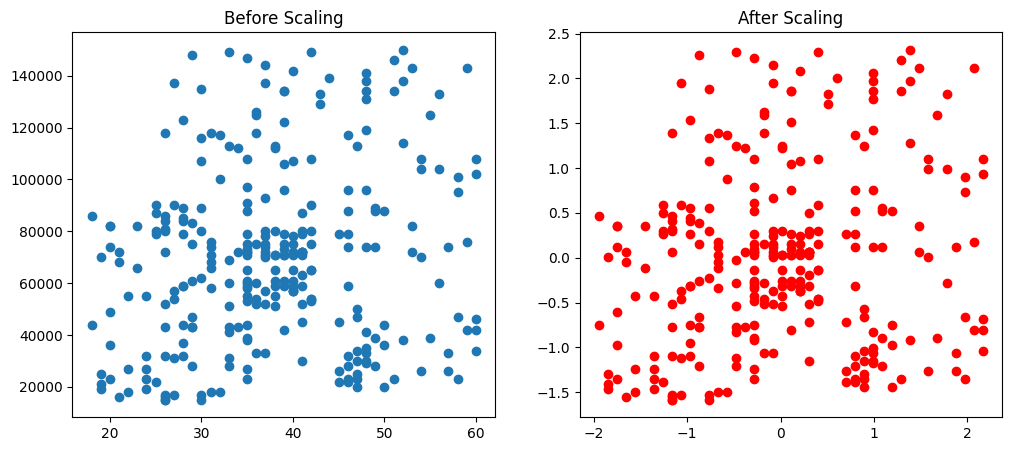

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

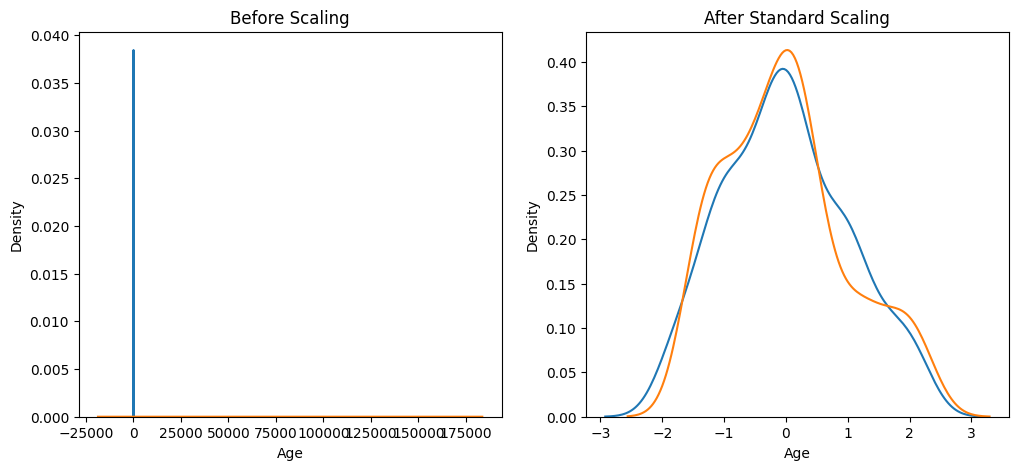

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparision of distributions

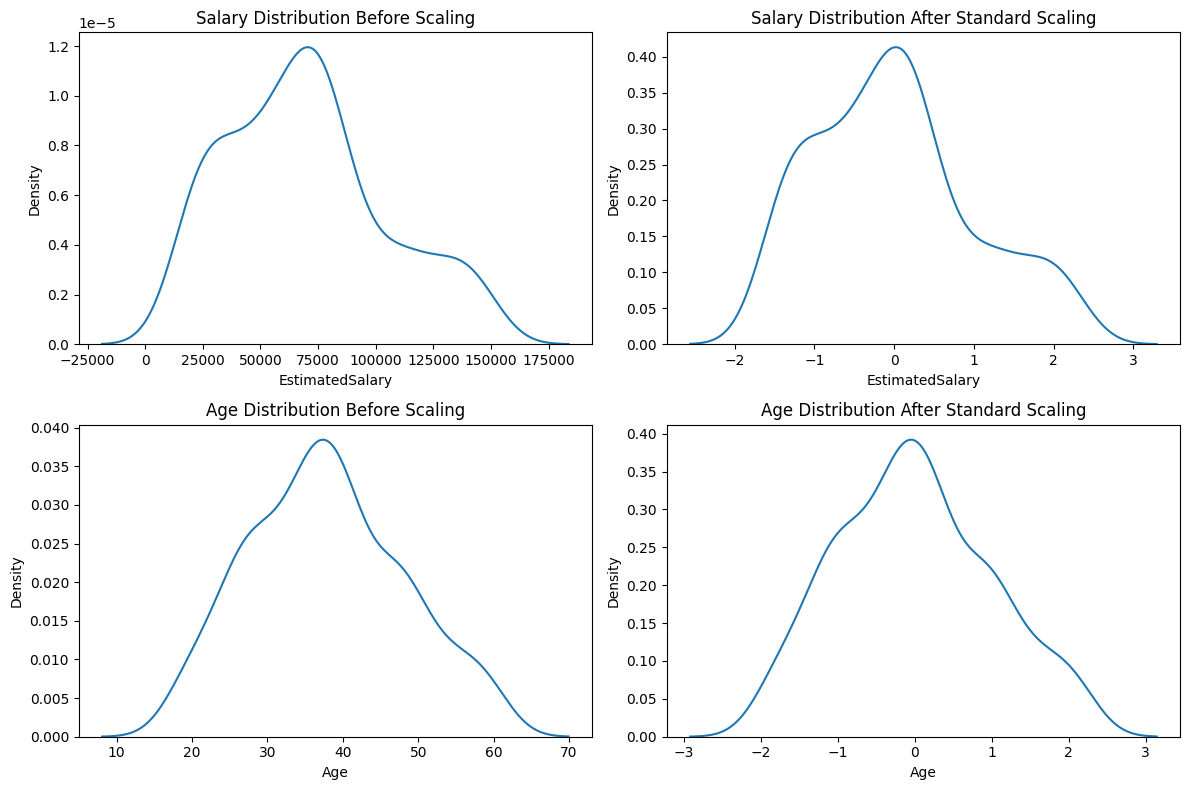

In [13]:
# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Before scaling - Salary Distribution
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# After scaling - Salary Distribution
ax2.set_title('Salary Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)

# Before scaling - Age Distribution
ax3.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax3)

# After scaling - Age Distribution
ax4.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax4)

# Adjust layout
plt.tight_layout()
plt.show()

Applying Logistc Regression with and without scaling

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


lr = LogisticRegression()
lr_scaled = LogisticRegression()
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

print("Actual:",accuracy_score(y_test,y_pred))
print("Scaled:",accuracy_score(y_test,y_pred_scaled))

Actual: 0.6583333333333333


ValueError: Found input variables with inconsistent numbers of samples: [120, 280]

We can see that the accuracy of Logistic Regression has increased after scaling the features